# Turma #867 - Projeto Machine Learning I - Equipe 03
---


## Modelo Naive Bayes

O modelo Naive Bayes é uma técnica de modelagem em Machine Learning para problemas de classificação, que é bastante utilizada porque é muito simples. Ele considera a probabilidade de ocorrência de um evento B, dado que ocorreu A (aplicação do Teorema de Bayes). É considerado uma técnica ingênua (Naive) porque pressupõe que as Features são independentes, isto é, não correlacionadas.

In [14]:
# Importa pctes

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

#### Importar base application_train para desenvolvimento do modelo
---

In [2]:
# Importando a base de dados application_train
credit = pd.read_csv('application_train.csv')

# Mostrar as primeiras linhas
credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [28]:
# Qual tamanho da base?
credit.shape

(246008, 122)

In [57]:
# Avaliando como está a distribuição do target
credit['TARGET'].value_counts(normalize=True)

0    0.918824
1    0.081176
Name: TARGET, dtype: float64

Está muito desbalanceado. Mas vamos deixar assim, porque optamos por seguir desta forma e ficou alinhado com o prof Telson na 6a feira que seguiríamos sem aplicar nenhuma técnica de balanceamentos dos dados

In [29]:
#Importando o dicionário tb, pra dar uma olhada nas variáveis
dicionario = pd.read_csv('C:/Users/Mari/Documents/LetsCode/Machine_Learning_I/credito-imoveis/HomeCredit_columns_description.csv'
                         ,encoding='latin1')
dicionario.head(50)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [64]:
dicionario.tail(50)

,Unnamed: 0,Table,Row,Description,Special
169,172,credit_card_balance.csv,CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous cr...,NaN
170,173,credit_card_balance.csv,NAME_CONTRACT_STATUS,"Contract status (active signed,...) on the pre...",NaN
171,174,credit_card_balance.csv,SK_DPD,DPD (Days past due) during the month on the pr...,NaN
172,175,credit_card_balance.csv,SK_DPD_DEF,DPD (Days past due) during the month with tole...,NaN
173,176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
177,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
178,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN


In [ ]:
# Dando uma olhada em algumas Features para fazer o modelo

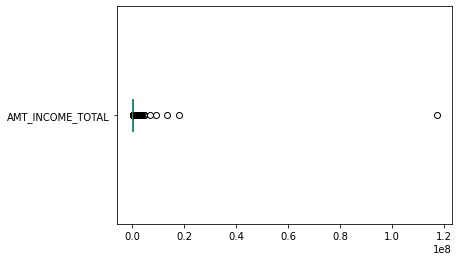

In [68]:
credit.plot(y='AMT_INCOME_TOTAL', kind='box', vert=False);

Essa variável parece ser uma boa Feature para explicar a inadimplência, mas ela contém outliers que podem prejudicar a análise. Em um modelo na vida real, eu retiraria esses outliers para prosseguir com o modelo. Aqui nesse projeto, especificamente, não vou retirar porque isso impacta na seleção de base treino e teste que foram utilizadas para os demais modelos (Árvore, Random Forest, KNN).

In [72]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [76]:
credit_ajust1 = outliers(credit, 'AMT_INCOME_TOTAL')
credit_ajust1.AMT_INCOME_TOTAL.describe()

count    234787.000000
mean     154264.952445
std       63986.978359
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

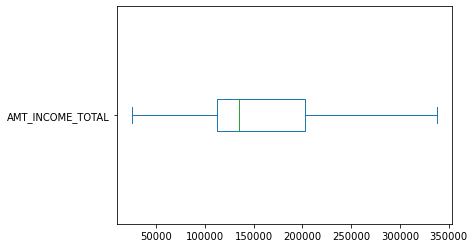

In [77]:
credit_ajust1.plot(y='AMT_INCOME_TOTAL', kind='box', vert=False);

De fato, retirando os outliers, a variável AMT_INCOME_TOTAL parece ter uma distribuição aproximadamente Normal.

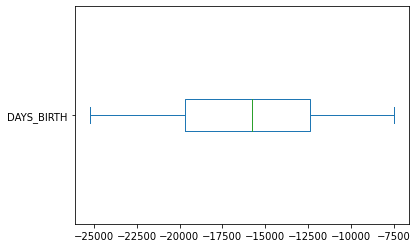

In [82]:
credit.plot(y='DAYS_BIRTH', kind='box', vert=False);

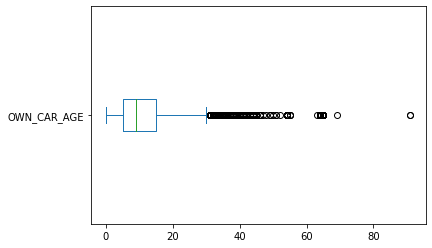

In [83]:
credit.plot(y='OWN_CAR_AGE', kind='box', vert=False);

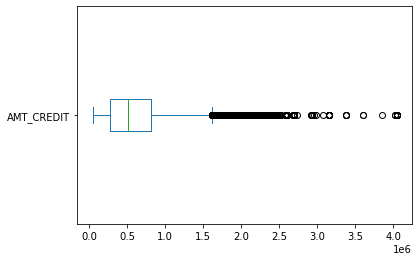

In [84]:
credit.plot(y='AMT_CREDIT', kind='box', vert=False);

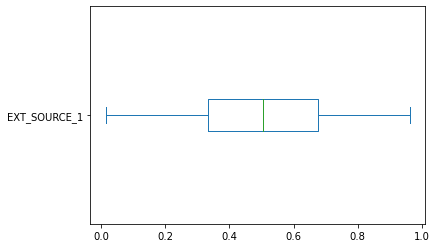

In [85]:
credit.plot(y='EXT_SOURCE_1', kind='box', vert=False);

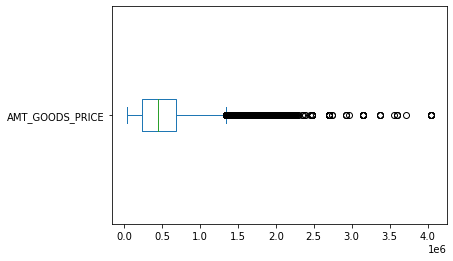

In [86]:
credit.plot(y='AMT_GOODS_PRICE', kind='box', vert=False);

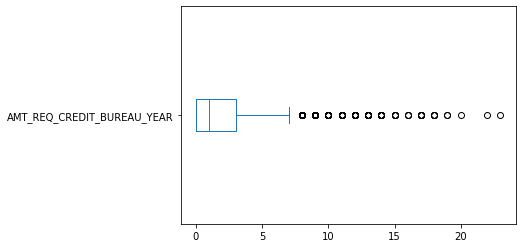

In [92]:
credit.plot(y='AMT_REQ_CREDIT_BUREAU_YEAR', kind='box', vert=False);

In [3]:
credit2 =  credit[['AMT_CREDIT',
                     'DAYS_BIRTH', 
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'OWN_CAR_AGE',
                     'EXT_SOURCE_1',
                     'AMT_GOODS_PRICE',
                     'TARGET']]

credit2.head(10)

,AMT_CREDIT,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,EXT_SOURCE_1,AMT_GOODS_PRICE,TARGET
0,700830.0,-8676,1.0,NaN,NaN,585000.0,0
1,375322.5,-13583,3.0,NaN,0.541385,324000.0,0
2,544491.0,-13993,3.0,9.0,NaN,454500.0,0
3,814041.0,-22425,4.0,NaN,NaN,679500.0,0
4,675000.0,-18839,0.0,NaN,0.592466,675000.0,0
5,630000.0,-11057,3.0,3.0,0.277270,630000.0,0
6,197820.0,-18011,NaN,NaN,0.512102,180000.0,1
7,271957.5,-8980,NaN,22.0,0.105328,252000.0,0
8,202500.0,-21109,3.0,NaN,0.751258,202500.0,0
9,1350000.0,-21271,3.0,4.0,NaN,1350000.0,0


In [4]:
# Avalia valores inválidos
(credit2.isna().sum()/len(credit2))*100

AMT_CREDIT                     0.000000
DAYS_BIRTH                     0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    13.484114
OWN_CAR_AGE                   65.997447
EXT_SOURCE_1                  56.422149
AMT_GOODS_PRICE                0.091867
TARGET                         0.000000
dtype: float64

In [5]:
# Substitui os valores NaN por 0
credit3 = credit2.replace(np.nan, 0)

In [6]:
# Avalia valores inválidos
(credit3.isna().sum()/len(credit3))*100

AMT_CREDIT                    0.0
DAYS_BIRTH                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
OWN_CAR_AGE                   0.0
EXT_SOURCE_1                  0.0
AMT_GOODS_PRICE               0.0
TARGET                        0.0
dtype: float64

In [7]:
# Análise descritiva das Features
credit3.describe()

,AMT_CREDIT,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,EXT_SOURCE_1,AMT_GOODS_PRICE,TARGET
count,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,2.460080e+05,246008.000000
mean,5.996283e+05,-16042.794393,1.643837,4.091985,0.218882,5.384338e+05,0.081176
std,4.030672e+05,4365.973763,1.854930,8.963336,0.285387,3.701641e+05,0.273106
min,4.500000e+04,-25229.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.700000e+05,-19691.000000,0.000000,0.000000,0.000000,2.385000e+05,0.000000
50%,5.147775e+05,-15763.000000,1.000000,0.000000,0.000000,4.500000e+05,0.000000
75%,8.086500e+05,-12418.000000,3.000000,5.000000,0.456289,6.795000e+05,0.000000
max,4.050000e+06,-7489.000000,23.000000,91.000000,0.962693,4.050000e+06,1.000000


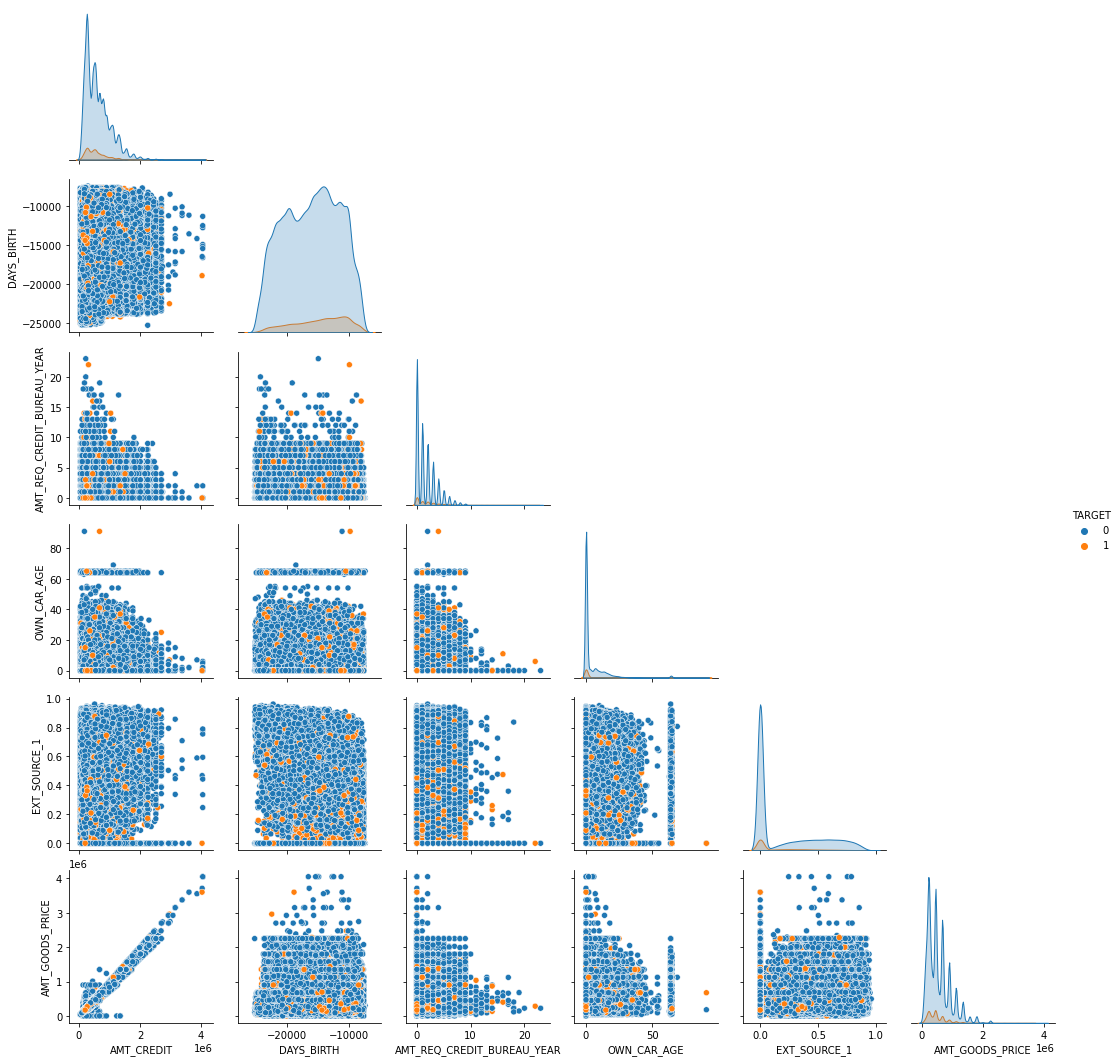

In [176]:
# Análise de relação entre colunas
sns.pairplot(
    credit3,
    x_vars=["AMT_CREDIT", "DAYS_BIRTH", "AMT_REQ_CREDIT_BUREAU_YEAR", "OWN_CAR_AGE", "EXT_SOURCE_1", "AMT_GOODS_PRICE"],
    y_vars=["AMT_CREDIT", "DAYS_BIRTH", "AMT_REQ_CREDIT_BUREAU_YEAR", "OWN_CAR_AGE", "EXT_SOURCE_1", "AMT_GOODS_PRICE"],
    hue = 'TARGET',
    corner=True)
plt.show()

<AxesSubplot:>

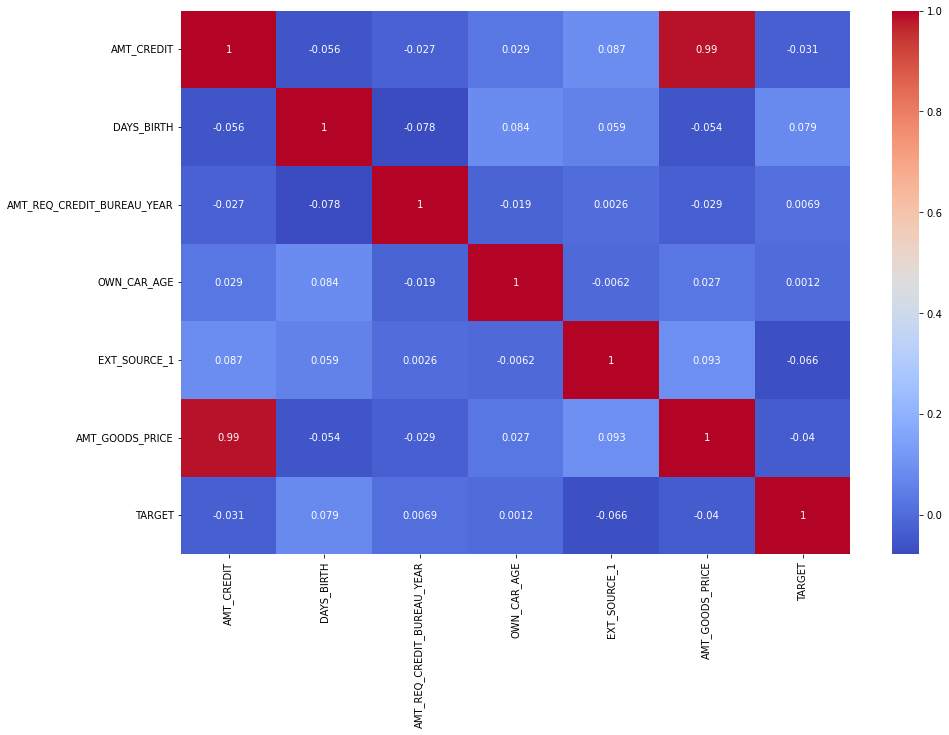

In [177]:
# Avalia correlação entre as variáveis, porque o Naive Bayes assume que as variáveis são independentes 
plt.figure(figsize=(15,10))
sns.heatmap(credit3.corr(), cmap='coolwarm', annot=True)

Dentre as variáveis selecionadas, apenas duas mostraram-se fortemente correlacionadas. São elas: AMT_CREDIT e AMT_GOODS_PRICE. Como isso não obedece à premissa para utilização do Naive Bayes, vou usar somente uma delas no modelo final.

In [8]:
#Define as variáveis explicativas e o target
X =   credit3[['AMT_CREDIT',
                 'DAYS_BIRTH', 
                 'AMT_REQ_CREDIT_BUREAU_YEAR',
                 'OWN_CAR_AGE',
                 'EXT_SOURCE_1']]

y = credit3['TARGET']

In [9]:
# Separando os dados entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 4)

Aqui foi onde tive a dúvida se deveria ou não normalizar as variáveis, já que elas estão em escalas bem diferentes.
Como o Naive Bayes é baseado em cálculo de probabilidades, teoricamente não importa se as variáveis estão na mesma escala ou em escalas muito distintas.
Vou seguir sem normalizar

In [10]:
# Aqui vou usar o GaussianNB porque as variáveis são contínuas
gauss = GaussianNB()
gauss.fit(X_treino, y_treino)

GaussianNB()

In [11]:
 # Aplica modelo treinado na base de teste (20% da base original application_train)
y_predito = gauss.predict(X_teste)


In [12]:
# Calcula Confusion Matrix
matrix = confusion_matrix(y_teste, y_predito)
matrix

array([[45189,     0],
       [ 4013,     0]], dtype=int64)

In [15]:
# Outras medidas de performance
print("Acurácia",accuracy_score(y_teste, y_predito))
print("-------------")
print(classification_report(y_teste, y_predito))
print("------")
print("Area curva ROC:", roc_auc_score(y_teste, y_predito))

Acurácia 0.9184382748668753
-------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45189
           1       0.00      0.00      0.00      4013

    accuracy                           0.92     49202
   macro avg       0.46      0.50      0.48     49202
weighted avg       0.84      0.92      0.88     49202

------
Area curva ROC: 0.5


Esse modelo não ficou muito bom. Na vida real, eu precisaria balancear os dados primeiro e depois tentaria ajustar outros modelos, usando outras Features para ver se consigo algum resultado melhor. Como o objetivo, por enquanto, está mais ligado ao fato de entender o passo a passo da modelagem e o que está por trás do cálculo do Naive Bayes e não ficar focado em conseguir um bom modelo em termos de performance, então vou seguir com esse mesmo.

### Importar base application_test_student para escorar o modelo
---

In [16]:
# Carregando o CSV
credit_test = pd.read_csv('application_test_student.csv')
credit_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,377703,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,188624,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [17]:
# Substitui os valores NaN por 0
credit_test2 = credit_test.replace(np.nan, 0)

In [18]:
# Avalia valores inválidos
(credit_test2.isna().sum()/len(credit_test2))*100

SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 121, dtype: float64

In [19]:
y_pred = gauss.predict_proba(credit_test2[['AMT_CREDIT',
                                 'DAYS_BIRTH', 
                                 'AMT_REQ_CREDIT_BUREAU_YEAR',
                                 'OWN_CAR_AGE',
                                 'EXT_SOURCE_1']].values)[:, 1]

In [22]:
credit_test2["PRED"] = y_pred
credit_test2[['AMT_CREDIT','DAYS_BIRTH', 
               'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE',
               'EXT_SOURCE_1','PRED']]

,AMT_CREDIT,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,EXT_SOURCE_1,PRED
0,417024.0,-21774,3.0,0.0,0.484936,0.060562
1,640080.0,-18499,1.0,0.0,0.624574,0.076529
2,900000.0,-18084,0.0,4.0,0.000000,0.065333
3,1125000.0,-12319,1.0,6.0,0.000000,0.071298
4,835380.0,-10151,2.0,6.0,0.000000,0.110202
...,...,...,...,...,...,...
61498,472500.0,-17817,0.0,9.0,0.000000,0.084264
61499,508495.5,-22836,0.0,0.0,0.000000,0.054321
61500,808650.0,-20014,0.0,18.0,0.000000,0.061181
61501,590337.0,-8201,1.0,0.0,0.000000,0.135963


In [21]:
credit_test2[['SK_ID_CURR','PRED']].to_csv('previsao-naive-bayes.csv', index=False)

Conclusão Geral: Este modelo Naive Bayes não pode ser avaliado para esse conjunto de dados especificamente, em virtude de ter sido processado em uma base sem o uso de balanceamento dos dados. Observamos que há uma desproporção muito grande entre bons (91%) e maus (9%), o que já é um indício de provável overfiting. Isso é reforçado ao observar a acurácia (acima de 90%) e em contrapartida um ROC AUC muito baixo (0,5)

---